<a href="https://colab.research.google.com/github/Swmar23/WSI-AI/blob/main/lista3/L3Z2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marek Świergoń 261750

# **Sprawozdanie z zadania 2 z listy 3 — laboratorium z Wprowadzenia do Sztucznej Inteligencji.**

Celem zadania było stworzenie własnego zbioru testowego cyfr zapisanych ręcznie. Cyfry zapisane zostały czarnym markerem na białej kartce papieru i zeskanowane skanerem. Ze względu na fakt, iż liczby ze zbioru danych MNIST (który został wykorzystany w zadaniu 1 do uczenia sieci) są zapisane w odwróconej skali szarości (tło ma wartości bliskie 255 zaś cyfra bliskie zero),to skany cyfr również musiały zostać przedstawione w tym formacie. Cyfry zostały zapisane na prywatnym dysku Google w osobnych plikach o rozmiarze 28 na 28 pikseli.

Zbiór danych testowych (w odwróconych kolorach) wygląda następująco:

 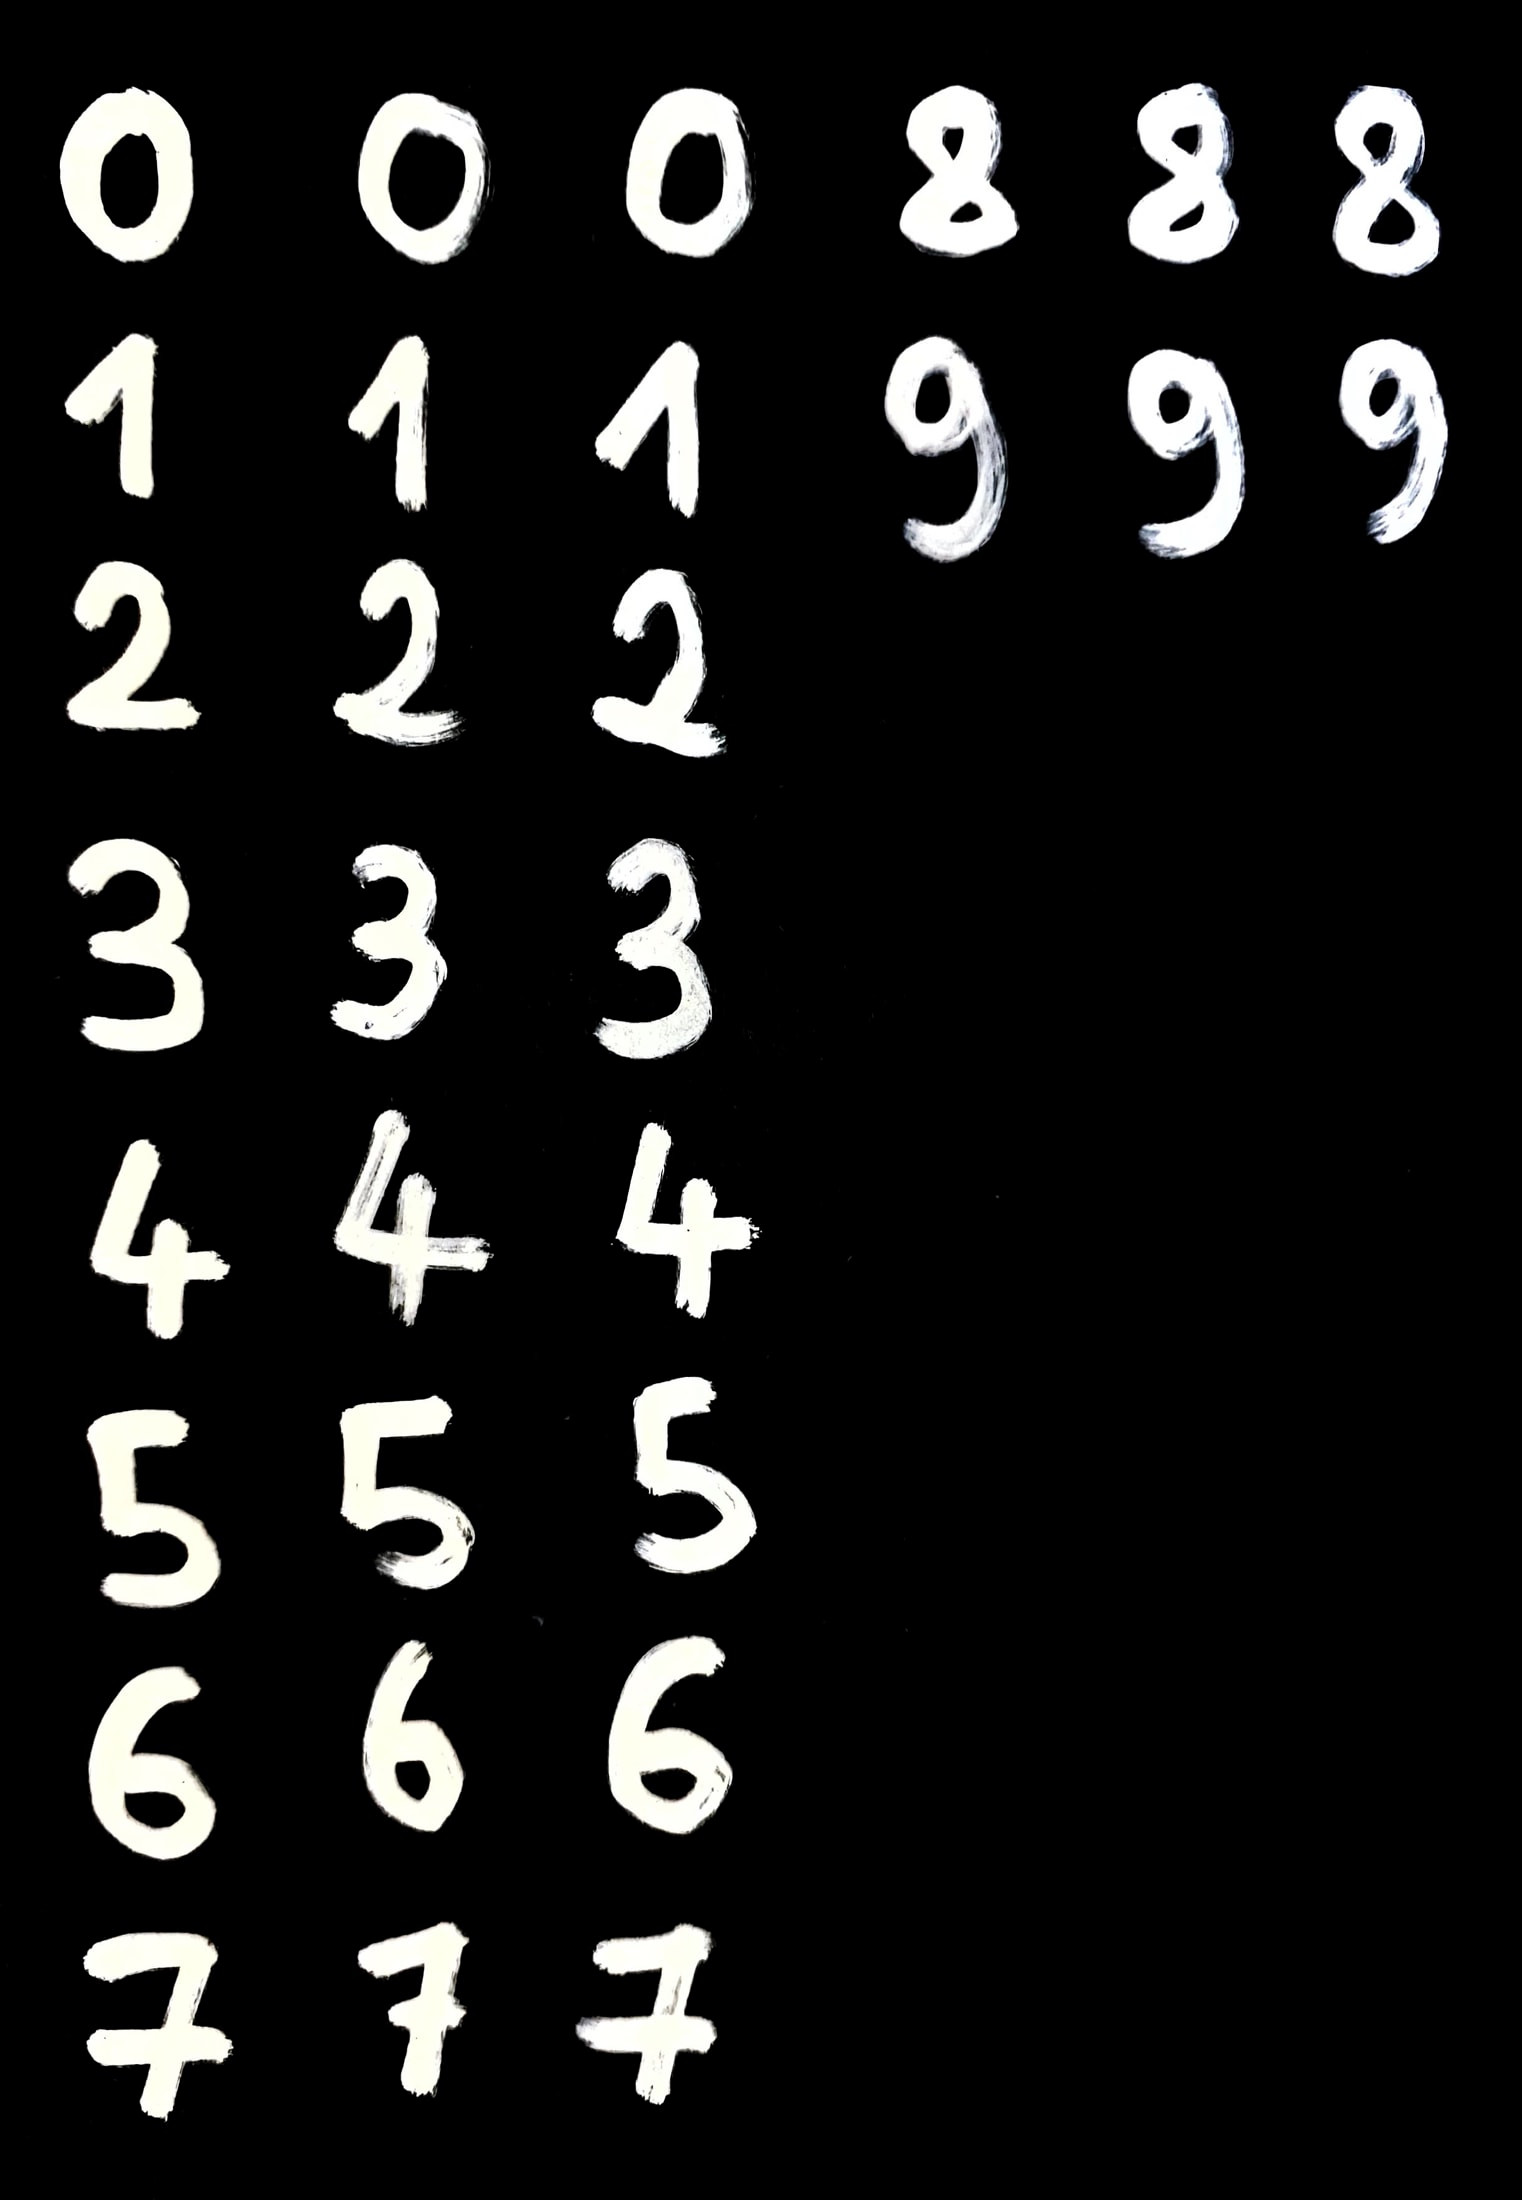

 Poniższy kod odpowiada za załadowanie modelu z zadania 1 (zapisanego na dysku Google), załadowanie plików ze zdjęciami (wraz z normalizacją wartości skali szarości) i pokazanie predykcji stawianych przez sieć neuronową odnośnie klasyfikacji cyfr.

<ipython-input-5-014aec21a36b>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread(image_file)


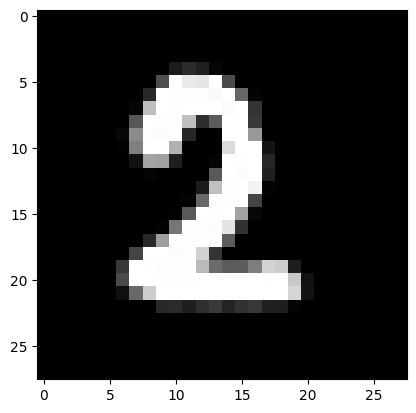

1/1 [==============================] - 0s 84ms/step
2


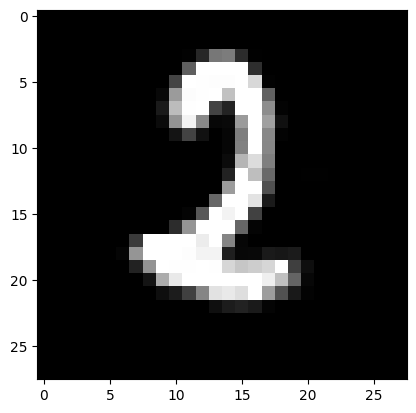

1/1 [==============================] - 0s 32ms/step
2


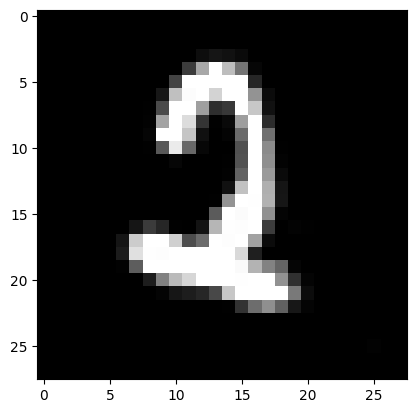

1/1 [==============================] - 0s 37ms/step
2


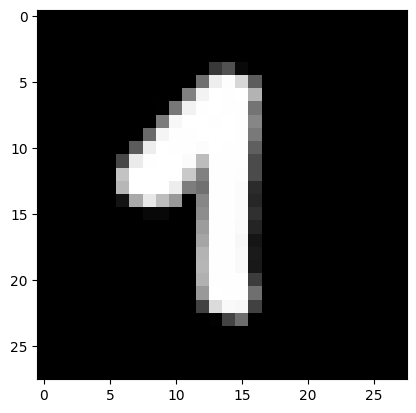

1/1 [==============================] - 0s 32ms/step
8


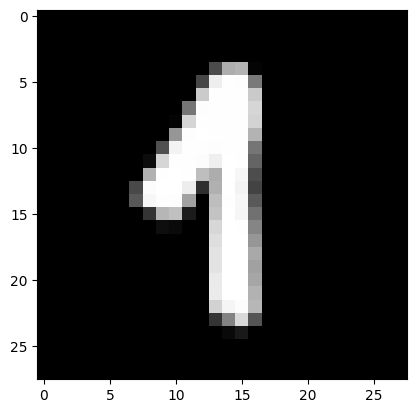

1/1 [==============================] - 0s 36ms/step
1


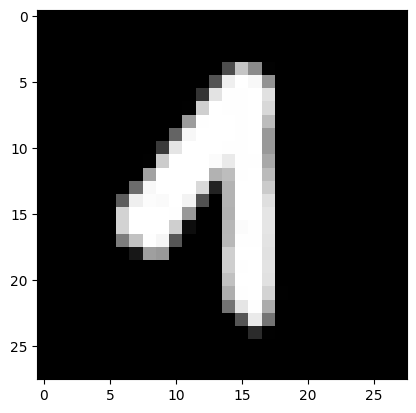

1/1 [==============================] - 0s 51ms/step
4


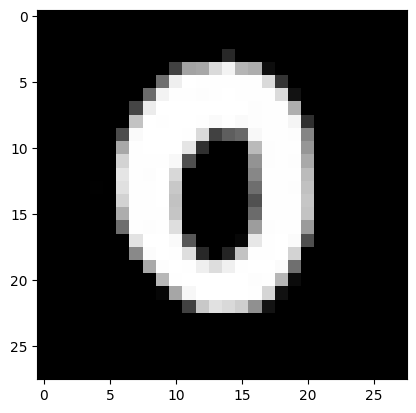

1/1 [==============================] - 0s 33ms/step
0


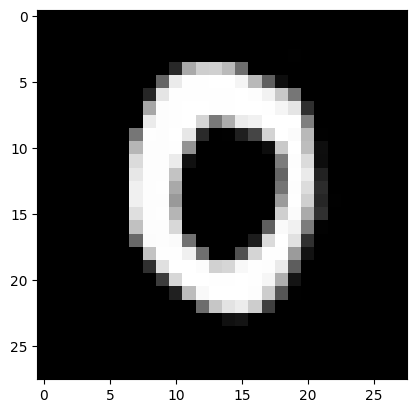

1/1 [==============================] - 0s 34ms/step
0


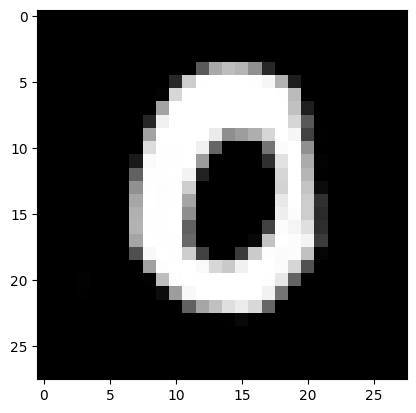

1/1 [==============================] - 0s 45ms/step
0


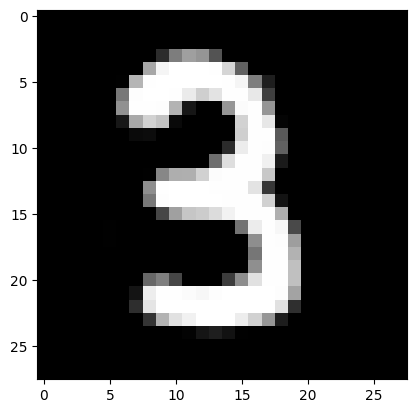

1/1 [==============================] - 0s 34ms/step
3


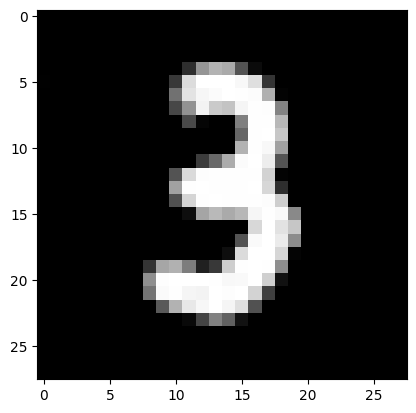

1/1 [==============================] - 0s 30ms/step
3


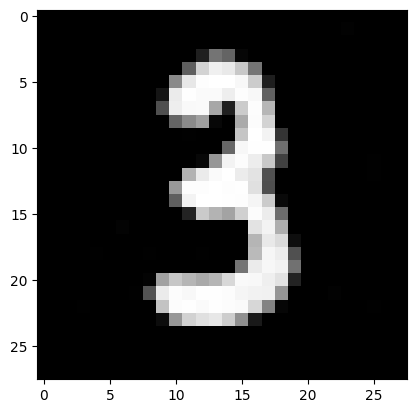

1/1 [==============================] - 0s 22ms/step
3


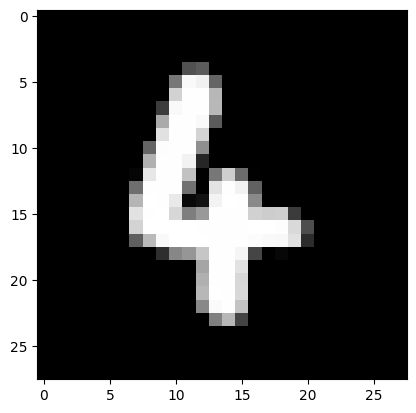

1/1 [==============================] - 0s 22ms/step
4


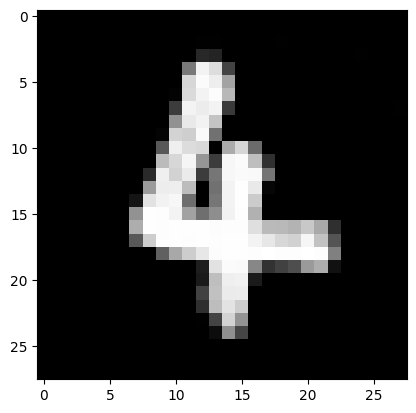

1/1 [==============================] - 0s 26ms/step
4


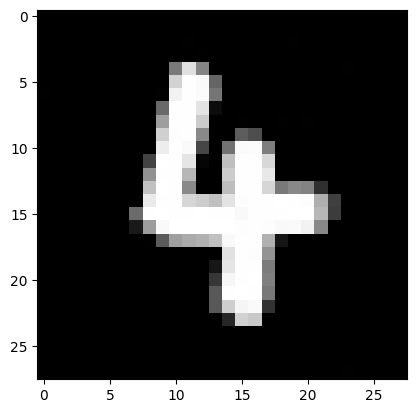

1/1 [==============================] - 0s 26ms/step
4


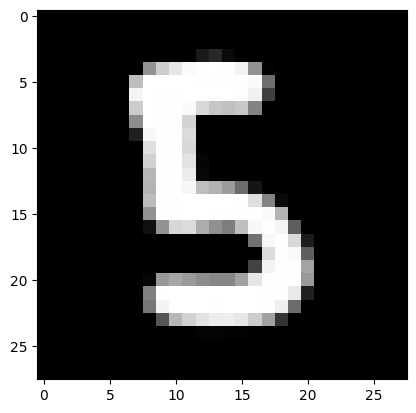

1/1 [==============================] - 0s 26ms/step
5


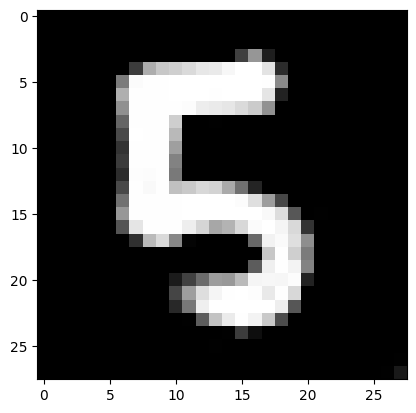

1/1 [==============================] - 0s 27ms/step
5


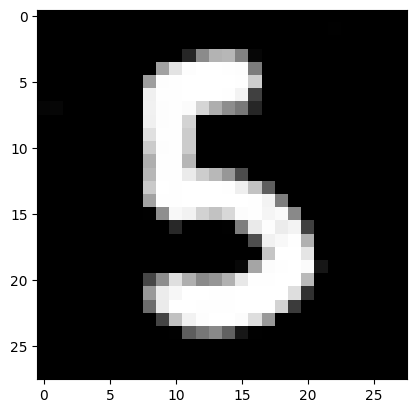

1/1 [==============================] - 0s 25ms/step
5


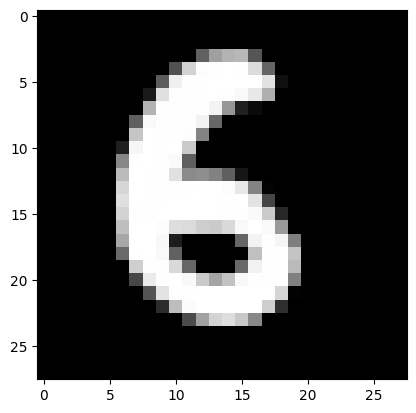

1/1 [==============================] - 0s 27ms/step
6


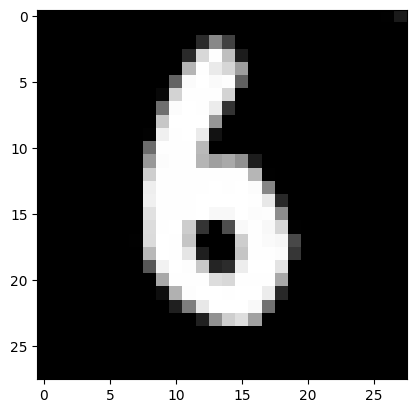

1/1 [==============================] - 0s 25ms/step
6


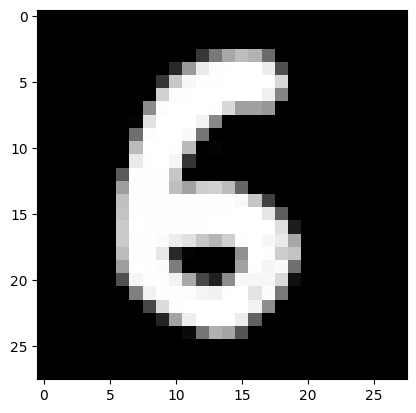

1/1 [==============================] - 0s 23ms/step
6


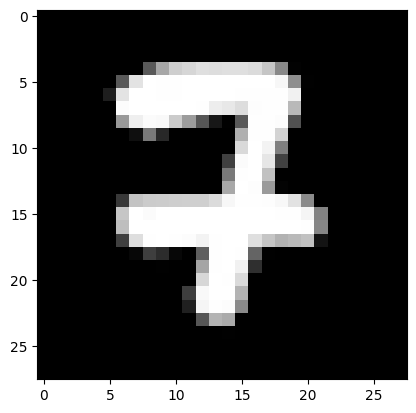

1/1 [==============================] - 0s 22ms/step
2


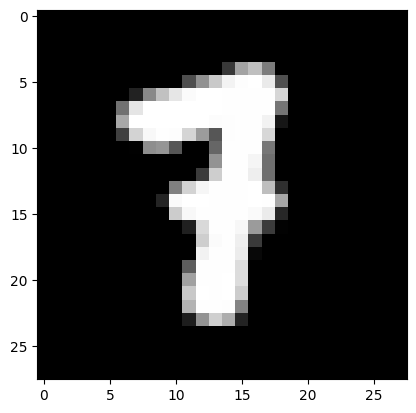

1/1 [==============================] - 0s 23ms/step
7


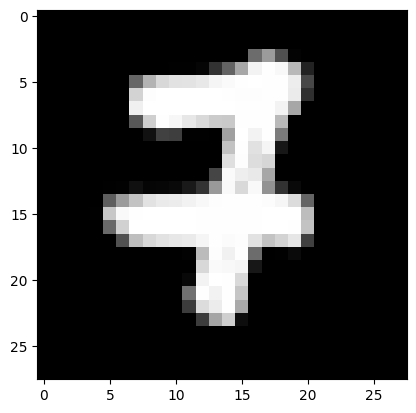

1/1 [==============================] - 0s 24ms/step
7


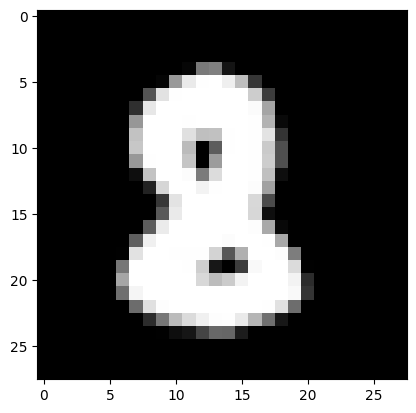

1/1 [==============================] - 0s 27ms/step
8


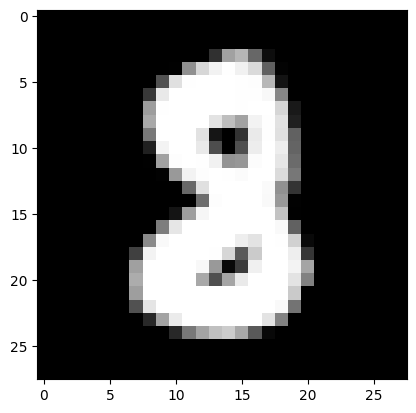

1/1 [==============================] - 0s 24ms/step
8


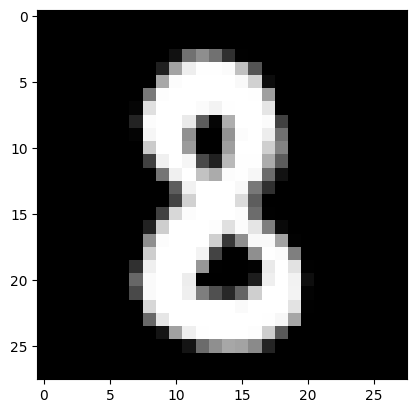

1/1 [==============================] - 0s 25ms/step
8


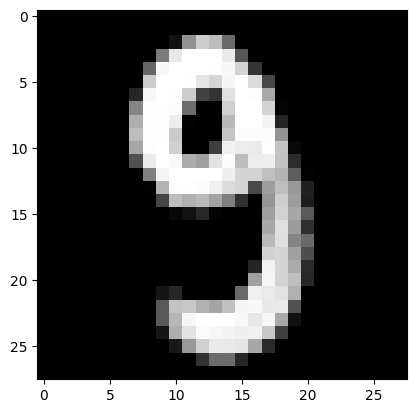

1/1 [==============================] - 0s 21ms/step
3


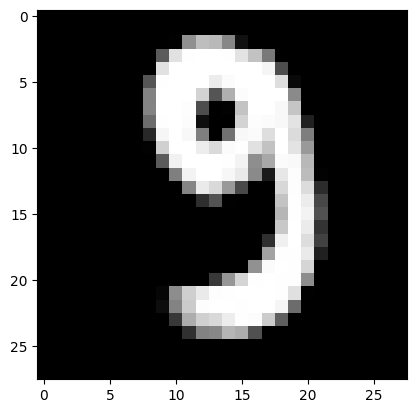

1/1 [==============================] - 0s 22ms/step
3


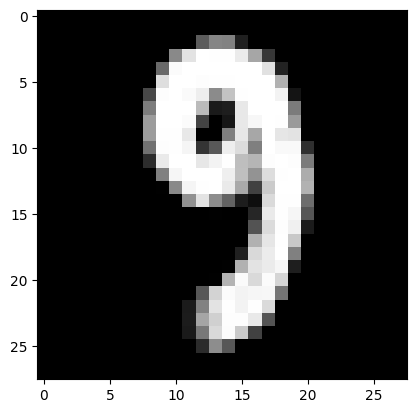

1/1 [==============================] - 0s 20ms/step
3


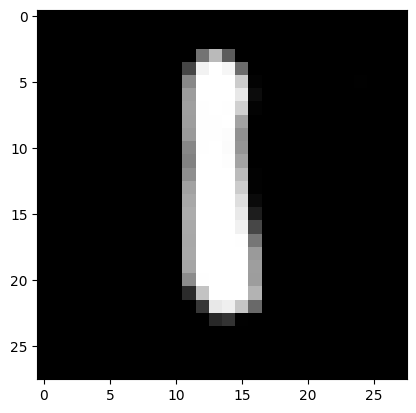

1/1 [==============================] - 0s 21ms/step
1


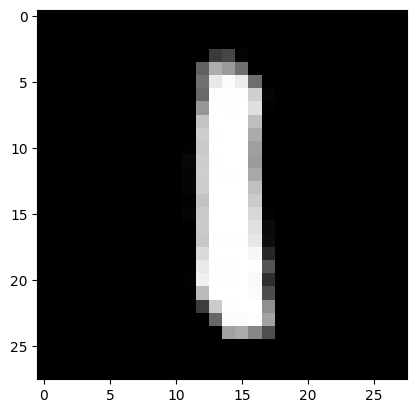

1/1 [==============================] - 0s 23ms/step
1


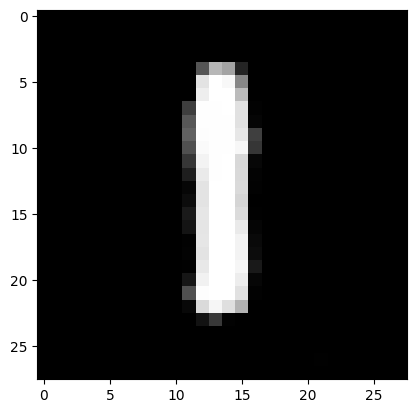

1/1 [==============================] - 0s 21ms/step
1


In [ ]:
# Marek Świergoń 261750
import tensorflow as tf
import imageio as iio
import numpy as np
import os
from matplotlib import pyplot as plt

model = tf.keras.models.load_model('/content/drive/MyDrive/WSI_L3/mnist_recognition_model.h5')

folder_path = '/content/drive/MyDrive/WSI_L3/my_data_inverted' # Replace with the path to your folder
image_files = []

# Loop through all files in the folder and add image files to the list
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_files.append(os.path.join(folder_path, filename))

# Loop through the list of image files and read each one using imageio
for image_file in image_files:
    image = iio.imread(image_file)
    image_gray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
    plt.imshow(image_gray, cmap = plt.get_cmap('gray'))
    plt.show()  # showing images
    image_gray = image_gray.reshape(1, 28, 28, 1)
    image_gray = image_gray / 255.0 # normalize values
    prediction = model.predict(image_gray)
    print(prediction.argmax()) # showing models highest valued class (softmax used as activation in last layer of model)



Poniższa tabela przedstawia wyniki pracy modelu. Predykcje cyfr przedstawiane są w kolejności zgodnej z obrazkiem, od lewej do prawej.

Zapisana cyfra | Predykcja modelu dla obrazka 1 | Predykcja modelu dla obrazka 2 | Predykcja modelu dla obrazka 3 | Skuteczność
---------------|--------------------------------|------------------------------------|------------------------------|-----------
0 | 0 | 0 | 0 | 100%
1 | 8 | 1 | 4 | 33%
2 | 2 | 2 | 2 | 100%
3 | 3 | 3 | 3 | 100%
4 | 4 | 4 | 4 | 100%
5 | 5 | 5 | 5 | 100%
6 | 6 | 6 | 6 | 100%
7 | 2 | 7 | 7 | 66%
8 | 8 | 8 | 8 | 100%
9 | 3 | 3 | 3 | 0%
WSPÓŁCZYNNIK ROZPOZNAWALNOŚCI |(ogółem) | | | 80%

Widzimy, że wszystkie cyfry poza 1, 7 i 9 są dobrze rozpoznawane przez sieć.
W przypadku cyfry 7 omyłkowo zaklasyfikowanej jako 2 może to wynikać ze zbyt szerokiej belki w środku zapisanej cyfry. Żeby zrozumieć przyczynę omyłek sieci dla cyfr 1 i 9 trzeba zajrzeć do zbioru danych MNIST, na którym sieć była trenowana.

Okazuje się, że cyfry 1 i 9 są zapisywane istotnie inaczej w zdecydowanej większości danych treningowych. W przygotowanej przeze mnie próbce cyfra 1 zapisywana jest z ,,daszkiem''; w MNIST zwykle jest to po prostu pionowa kreska. Z kolei cyfra 9 nie ma tak mocno zawiniętego ,,ogona'' co w moim piśmie. W przygotowanych przeze mnie danych dolna część cyfry 9 jest bardzo podobna do cyfry 3, co mogło wpłynąć na ocenę modelu. Zdjęcie poniżej obrazuje próbkę danych MNIST.
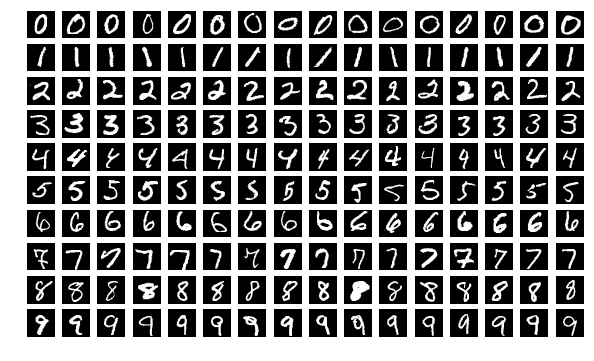

Przypuszczenia te możemy potwierdzić, tworząc dodatkową próbkę danych zgodnie ze stylem pisma z MNIST. Dla cyfry 1 zapisałem 3 razy cyfrę 1 ,,bez daszka''. Nowe dane przedstawia poniższy obrazek. 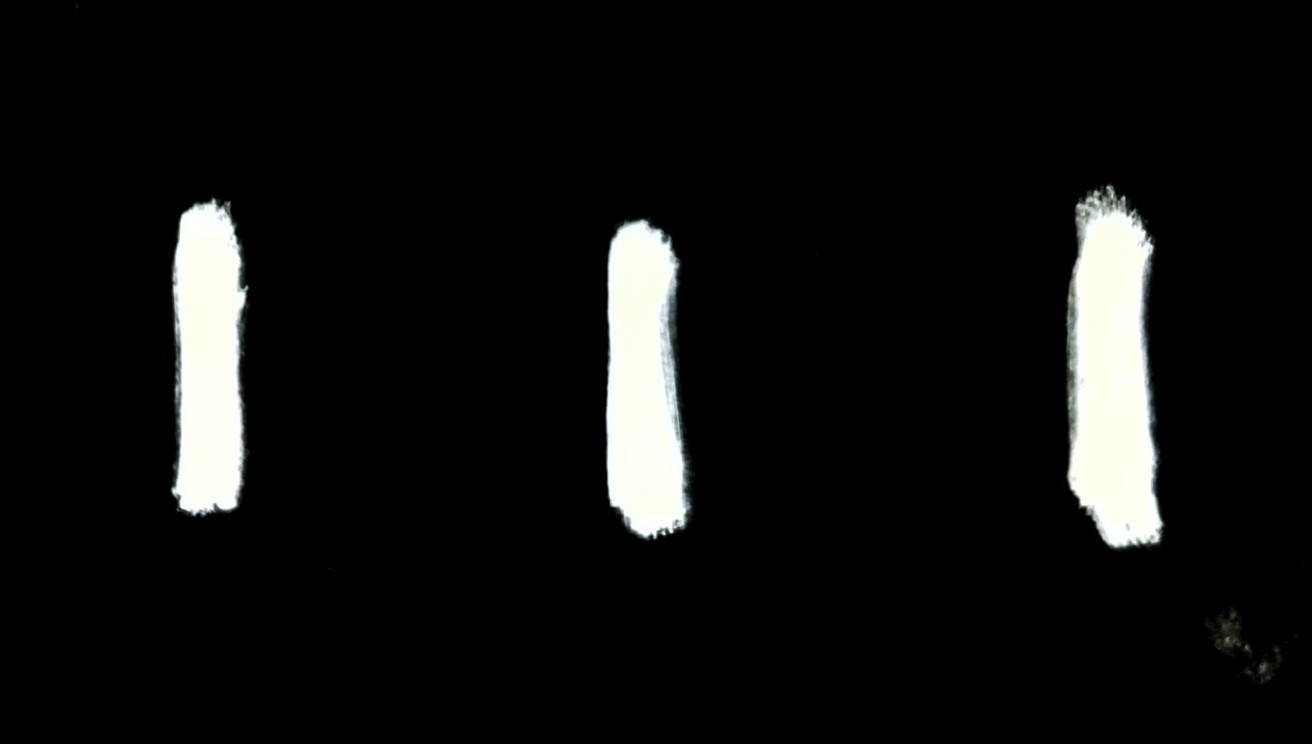

Podobnie jak poprzednio, cyfry zostały przeskalowane i pocięte na osobne pliki 28 na 28 pikseli. Dla takich danych model poprawnie stwierdził dla każdej z trzech cyfr, że jest ona cyfrą 1.

Dodatkowo skuteczność modelu mogłaby być większa przy uprzednio zastosowanej konwolucji dwuwymiarowej i dodatkowych technik uniwersalizacji modelu (losowa rotacja i/lub przeskalowanie cyfr).